In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met, u_statistics, u_plot
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
import pandas as pd
import pickle as pkl
from utils import constants as cnst


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [13]:
cores_gt15000km2_table_AMSRE_LSTA_tracking_bigWin_2hOverlap

NameError: name 'cores_gt15000km2_table_AMSRE_LSTA_tracking_bigWin_2hOverlap' is not defined

In [14]:
msg = pd.read_csv(cnst.network_data + 'figs/LSTA/corrected_LSTA/new/ERA5/core_txt/cores_gt15000km2_table_AMSRE_LSTA_tracking_2hOverlap_17.csv', na_values=-999)
#msg = pd.read_csv(cnst.network_data + 'figs/LSTA/corrected_LSTA/new/ERA5/core_txt/cores_gt15000km2_table_AMSRE_LSTA_tracking_bigWin_2hOverlap_17.csv', na_values=-999)

In [17]:
msg = msg[ (msg['dtime']<=2)  & (np.isfinite(msg['SMmean0'])) & (msg['LSTAslotfrac']>=0.05)] #  & (np.isfinite(msg['SMmean0'])) #msg['LSTAslotfrac']>=0.3) &

msgin = msg[(msg['lat']>9.5) & (msg['lat']<19) & (msg['topo']<450)]

In [18]:
msgin

,id,year,month,day,hour,lon,lat,xloc,yloc,area,...,topo,SMmean0,SMdry0,SMwet0,SMmean-1,SMdry-1,SMwet-1,LSTAmean,LSTAslotfrac,dtime
53,53,2006,6,2,17,0.150888,10.278089,612,232,15000,...,154.50,-1.514151,1.0,0.0,-4.590760,1.0,0.0,3.725500,0.950649,1.0
183,183,2006,6,7,17,-4.250857,11.653897,453,281,205650,...,326.50,-9.787069,1.0,0.0,1.163167,0.0,1.0,-0.186907,1.000000,2.0
186,186,2006,6,7,17,-5.104256,11.919413,423,290,205650,...,343.00,-6.332150,1.0,0.0,1.495200,0.0,1.0,0.523872,1.000000,1.0
187,187,2006,6,7,17,-5.463582,11.963640,410,291,205650,...,304.00,-4.803972,1.0,0.0,1.092783,0.0,1.0,0.781796,1.000000,0.0
191,191,2006,6,7,17,-3.846615,12.273024,468,303,205650,...,281.75,-6.939937,1.0,0.0,0.639680,0.0,1.0,0.227236,1.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19432,20248,2010,9,28,17,-5.643245,13.814258,405,357,38400,...,262.75,-3.217164,1.0,0.0,-0.328692,0.0,0.0,-2.728796,0.141558,0.0
19433,20249,2010,9,28,17,-5.912740,14.165138,396,369,38400,...,277.00,-2.538554,1.0,0.0,0.428418,0.0,1.0,-3.267512,0.120779,0.0
19434,20250,2010,9,28,17,-5.912740,14.252773,396,372,38400,...,269.75,-2.649321,1.0,0.0,0.346594,0.0,1.0,-3.635463,0.123377,0.0
19435,20251,2010,9,28,17,-5.688161,14.252773,404,372,38400,...,275.00,-2.600472,1.0,0.0,0.321475,0.0,1.0,-3.794424,0.128571,0.0


In [55]:
np.percentile(msgin['SMmean-1'],75)

0.8458816225926276

In [59]:
np.percentile(msgin['SMmean-1'],10)

-3.602738596205788

In [57]:
len(msgin[(msgin['SMmean0']>0.01)&(msgin['SMmean-1']>0.8)])

251

In [62]:
len(msgin[(msgin.SMmean0<-0.5) & (msgin['SMmean-1']<-3.5)])

259

In [78]:
np.percentile(msgin.SMmean0,10)

-5.330660679190093

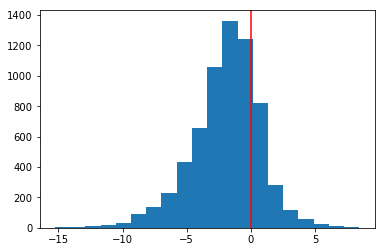

In [61]:
plt.hist(msgin.SMmean0, bins=20)
plt.axvline(0, color='r')

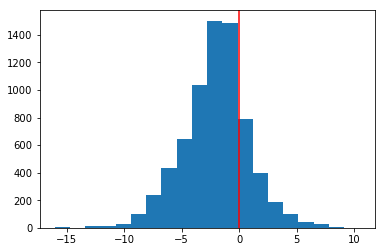

In [53]:
plt.hist(msgin.SMmean0, bins=20)
plt.axvline(0, color='r')

In [203]:
mcsimage = xr.open_dataarray(cnst.MCS_15K)
date = mcsimage[112].time
date

<xarray.DataArray 'time' ()>
array('2006-06-05T16:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2006-06-05T16:00:00

In [204]:
date=pd.to_datetime(date.values)

In [205]:
date

Timestamp('2006-06-05 16:00:00')

In [189]:
file = cnst.MCS_POINTS_DOM
msg = xr.open_dataarray(file)
msg = msg.sel(time=date, lat=slice(9,19.5), lon=slice(-11.5, 11.5))
mcs_hour = xr.open_dataarray(cnst.MCS_HOUR_DAILY)  ###5km grid
mcsimage = mcsimage.sel(time=date, lat=slice(9,19.5), lon=slice(-11.5, 11.5))
date = date.replace(hour=14)
mhour = mcs_hour.sel(time=date, lat=slice(9,19.5), lon=slice(-11.5, 11.5))

In [190]:
msg

<xarray.DataArray (lat: 240, lon: 512)>
[122880 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -11.48 -11.44 -11.39 -11.35 ... 11.38 11.42 11.47
  * lat      (lat) float64 9.03 9.075 9.119 9.164 ... 19.36 19.4 19.44 19.48
    time     datetime64[ns] 2006-06-05T16:00:00

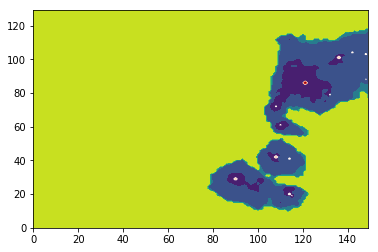

In [191]:
plt.contourf(mcsimage[0:130,90:240])
plt.contour(msg[0:130,90:240], cmap='Reds')

[16. 15. 15. 16. 15. 15. 15. 16. 16. 16. 16. 15. 15. 14. 16. 14. 15. 16.
 15. 15. 16. 14. 14. 14. 16. 16.]


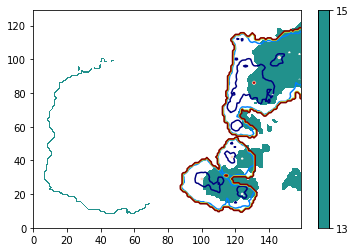

In [197]:
plt.contourf(mhour[0:130,80:240], levels=[13,15])
plt.colorbar()
plt.contour(mcsimage[0:130,80:240], cmap='jet')
plt.contour(msg[0:130,80:240], cmap='Reds')
pos = np.where(msg > 5)
print(mhour.values[pos])

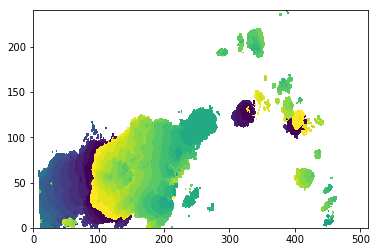

In [170]:
plt.pcolormesh(mhour)

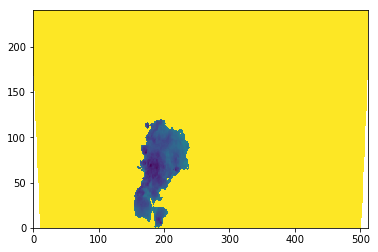

In [171]:
plt.pcolormesh(mcsimage)